<a href="https://colab.research.google.com/github/Drecho-p/Estadistica_1/blob/main/VF_pp_3_Estadistica_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis descriptivo sobre el tiempo de gestacion de un nacido vivo y la talla del recien nacido vivo, al nacer y su correlación.

*   Jorge Ivan Ojeda Rangel
*   Andrés Javier Sepúlveda Vesga
*   Joseph Stiven Pinzón Cuadros


## Resumen

En el siguiente informe se realiza un análisis descriptivo sobre el tiempo de gestación de un nacido vivo y la talla de un recien nacido vivo en 2023 al momento de nacer. Tambien se estudia el grado de correlación que estas dos variables presentan segun los datos obtenidos gracias al censo de realizado por el Departamento Administrativo Nacional de Estadísticas (DANE) en el año 2023.

Se logro observar que la mayoria de los datos obtenidos en el estudio cumplen tanto que presentaron un tiempo gestacional entre las 28 y 41 semanas y una talla entre los 40 y 59 centimetros. Ademas se obtuvo que los datos presentan una correlación que varía entre lo discreto hasta lo fuerte según el coeficiente que se utilice para realización de su interpretación.

## Introducción

Las estadísticas vitales de una población son de gran importancia a la hora de analizar las características de una población de país y el la planificación de programas sociales [[1]](https://unstats.un.org/unsd/demographic-social/Standards-and-Methods/files/Principles_and_Recommendations/CRVS/M19Rev3-S.pdf). En particular el análisis de los datos recolectados referentes a los recién nacidos, como lo son el tiempo gestacional y la talla de un recién nacido vivo, son de alta importancia en la neonatología ya que sirven de indicadores de gran importancia para identificar el riesgo de patologías neonatales y determinar la salud de los recién nacidos tanto a nivel individual como colectivo [[2]](https://ri.conicet.gov.ar/handle/11336/217328), [[3]](https://www.msdmanuals.com/es/professional/pediatría/problemas-perinatales/edad-gestacional).

El presente trabajo se dispone a estudiar de forma descriptiva el tiempo de gestación y la talla de los recién nacidos en el año 2023. Se pretende buscar un rango de tiempo y de longitud en el cuál la mayoría de los datos registrados durante el censo se encuentren y se pretende realizar un estudio el cuál determine si estos dos conjuntos de datos se encuentran correlacionados.

## Metodología

Los datos utilizados en el estudio proceden de la base de datos suministrada por el Departamento Administrativo Nacional de Estadística (DANE) que lleva por nombre "Estadísticas Vitales - EEVV - 2023" la cual tiene por universo: Hecho vital, nacido vivo o defunción, ocurrido en el territorio nacional en cada año calendario. En particular se uso el archivo de datos "BD-EEVV-Nacimientos-2023"  el cual contiene 515549 registros obtenidos mediante certificados de nacido vivo.

De acuerdo con la informacion proporcionada por el DANE la recolección de los datos se dio en un periodo de tiempo que tuvo por inicio el 1 de enero del año 2023 y el cual finalizó el 31 de diciembre del año 2023. Los datos se obtuvieron mediante certificados de nacido vivo el cuál es un certificado antecedente el cuál es expedido por el médico o enfermera que haya asistido al parto y una vez completado es recibido por la Dirección Territorial de Salud y es enviado al DANE. Dado el caso en que no se dispongan de los recursos necesarios se ha autorizado a auxiliares de enfermería y promotores de salud el diligenciamiento del documento [[4]](https://microdatos.dane.gov.co/index.php/catalog/843/).

De este archivo se han estudiado particularmente las variables "T_GES" y "TALLA_NAC". "T_GES" es una variable cualitativa la cual representa el tiempo de gestacion del nacido vivo según la siguiente clasificación proporcionada por el DANE: menos de 22 semanas, 22 a 27 semanas, 28 a 37 semanas, 38 a 41 semanas, 42 o mas semanas, ignorado y sin información.

Por otro lado la variable "TALLA_NAC" es una variable cualitativa la cual representa la talla al nacer de un recién nacido vivo según la siguiente clasificación proporcionada por el DANE: Menos de 20 centímetros, 20 a 29 centímetros, 30 a 39 centímetros, 40 a 49 centímetros, 50 a 59 centímetros, 60 centímetros y más y sin información.

Para este estudio no se han considerado aquellos datos los cuales no estuvieran clasificados como "ignorado" o "sin información" en la variable "T_GES" y que no estuvieran clasificado como "sin información" en la variable "TALLA_NAC". De esta forma se obtuvieron 508049 observaciones válidas para este estudio.


## Resultados e interpretación

In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import math

A continuación se carga el archivo "BD-EEVV-Nacimientos-2023".



In [ ]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving BD-EEVV-Nacimientos-2023.csv to BD-EEVV-Nacimientos-2023.csv


In [ ]:
io_csv = io.BytesIO(uploaded['BD-EEVV-Nacimientos-2023.csv'])
tabla = pd.read_csv(io_csv, sep = ",",index_col=0, encoding='latin-1')
tabla1 = tabla[['T_GES', 'TALLA_NAC']]
tabla1.head(4)


,T_GES,TALLA_NAC
COD_DPTO,,
23,4,5
11,4,4
11,4,4
11,4,5


Al filtrar los datos obtenidos de forma que se obtengan resultados validos en las variables "T_GES" y "TALLA_NAC" se obtiene la siguiente tabla:

In [ ]:
df1 = tabla1[(tabla1.T_GES < 6) & (tabla1.TALLA_NAC < 9)]
df1.T_GES = df1.T_GES.astype(str)
df1.TALLA_NAC = df1.TALLA_NAC.astype(str)
df1.head(4)

<ipython-input-74-56f9c5e8aa2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.T_GES = df1.T_GES.astype(str)
<ipython-input-74-56f9c5e8aa2d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TALLA_NAC = df1.TALLA_NAC.astype(str)


,T_GES,TALLA_NAC
COD_DPTO,,
23,4,5
11,4,4
11,4,4
11,4,5


A continuación se procede a clasificar las variables segun la informacion proporcionada por el DANE.

In [ ]:
df1.loc[(df1.T_GES == '1'), "T_GES"] = "Menor a 22"
df1.loc[(df1.T_GES == '2'), "T_GES"] = "22-27"
df1.loc[(df1.T_GES == '3'), "T_GES"] = "28-37"
df1.loc[(df1.T_GES == '4'), "T_GES"] = "38-41"
df1.loc[(df1.T_GES == '5'), "T_GES"] = "42 o más"
df1.loc[(df1.T_GES == '6'), "T_GES"] = "Ignorado"

df1.loc[(df1.TALLA_NAC == '1'), "TALLA_NAC"] = "Menor a 20"
df1.loc[(df1.TALLA_NAC == '2'), "TALLA_NAC"] = "20-29"
df1.loc[(df1.TALLA_NAC == '3'), "TALLA_NAC"] = "30-39"
df1.loc[(df1.TALLA_NAC == '4'), "TALLA_NAC"] = "40-49"
df1.loc[(df1.TALLA_NAC == '5'), "TALLA_NAC"] = "50-59"
df1.loc[(df1.TALLA_NAC == '6'), "TALLA_NAC"] = "60 o mayor"

Ya con los valores filtrados y clasificados se procede a graficar el diagrama de barras de la variable "T_GES".

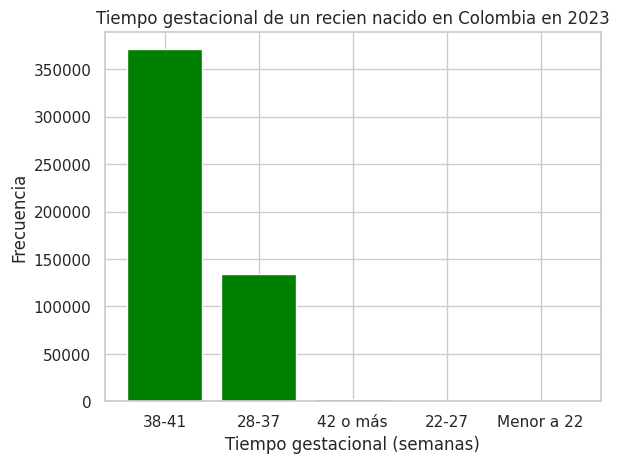

In [ ]:
x_values = df1.T_GES.unique()
y_values = df1.T_GES.value_counts().tolist()
plt.bar(x_values, y_values, color = 'green')
plt.title("Tiempo gestacional de un recien nacido en Colombia en 2023")
ax = plt.subplot()
plt.xlabel("Tiempo gestacional (semanas)")
plt.ylabel("Frecuencia")
plt.show()

A partir del grafico de barras se puede observar que la mayoria de los tiempos de gestacion reportados entran dentro de la categoria de 28 a 41 semanas con mas 350000 observaciones y de la categoria de 28 a 37 semanas con aprixamdamente 150000 observaciones.

Luego se grafica el diagrama circular de la variable "T_GES" y se calculan los porcentajes

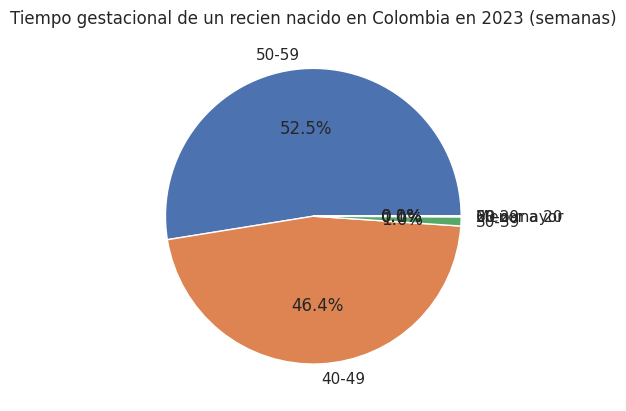

In [ ]:
plt.pie(y_values, labels = x_values, autopct='%1.1f%%')
plt.title("Tiempo gestacional de un recien nacido en Colombia en 2023 (semanas)")
plt.show()

In [ ]:
porcentaje = [(x/len(df1.T_GES)*100) for x in y_values]
print(y_values)
print(porcentaje)

[371090, 134513, 1950, 477, 19]
[73.04216719253458, 26.476383183511825, 0.38382124558851605, 0.09388858161319086, 0.0037397967518881053]


A partir de la gráfica y los calculos realizados se puede ver que aproximadamente el 73% de los embarazos tuvieron un tiempo de gestación promedio de 38 a 41 semanas, el 26.5% de 28 a 37 semanas, el 0.4% de 42 o más semanas, el 0.1% de 22 a 27 semanas y el 0.004% de menos de 22 semanas. Al comparar los resultados obtenidos en el estudio con los reportados por el DANE en su boletín técnico sobre las estadisticas vitales en donde se informa que en los años 2019, 2020, 2021, 2022 y 2023 el porcentaje de datos que reportan un tiempo de gestacion entre 37 y 41 semanas son: 89.5%, 88.9%, 88.0%, 88.0% y 88.4 % respectivamente [[5]](https://www.dane.gov.co/files/operaciones/EEVV/bol-EEVV-Nacimientos-IVtrim2023.pdf) se puede apreciar una diferencia notoria entre los porcentajes, lo cual indica una cantidad notoria de personas con un tiempo de gestacion entre 37 a 38 semanas.

Ahora, se procede a graficar el diagrama de barras de la variable "TALLA_NAC".

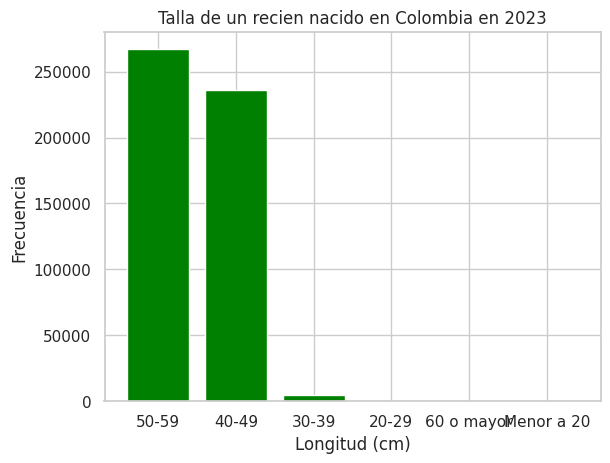

In [ ]:
x_values = df1.TALLA_NAC.unique()
y_values = df1.TALLA_NAC.value_counts().tolist()
plt.bar(x_values, y_values, color = 'green')
plt.title("Talla de un recien nacido en Colombia en 2023")
ax = plt.subplot()
plt.xlabel("Longitud (cm)")
plt.ylabel("Frecuencia")
plt.show()

A partir de la grafica de barras se puede observar que la mayoria de las observaciones realizadas caen dentro de la categoria de 50 a 59 centimetros con mas de 250000 observaciones y de la categoria de 40 a 49 centimetros con aproximadamente 250000.

Luego se grafica el diagrama circular de la variable "TALLA_NAC" y se calculan los porcentajes

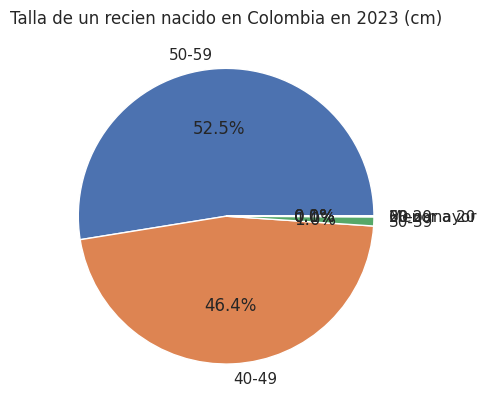

In [ ]:
plt.pie(y_values, labels = x_values, autopct='%1.1f%%')
plt.title("Talla de un recien nacido en Colombia en 2023 (cm)")
plt.show()

In [ ]:
porcentaje = [(x/len(df1.TALLA_NAC)*100) for x in y_values]
print(y_values)
print(porcentaje)

[266938, 235727, 5054, 306, 20, 4]
[52.54178238713195, 46.39847731222776, 0.9947859360022361, 0.06023041084619791, 0.003936628159882216, 0.0007873256319764433]


A partir del diagrama circular y de los calculos realizados se puede ver que aproximadamente el 52.5% de los recien nacidos, tuvieron una talla que cae dentro de la categoria de 50 a 59 centímetros, el 46.4% de 40 a 49 centímetros, el 1% de 30 a 39 centímetros, el 0.06% de 20 a 29 centímetros, el 0.004% de más de 59 centímetros y el 0.0008% de menos de 20 centímetros.

A continuación se realizará una tabla de continegencia entre las variables aleatorias "T_GES" y "TALLA_NAC".

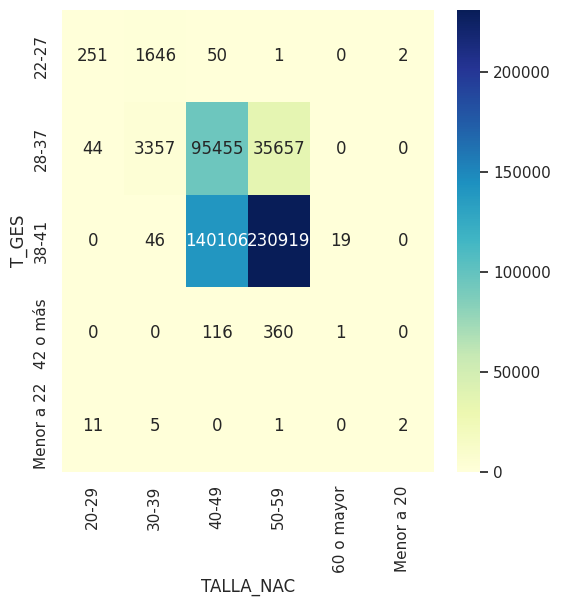

In [ ]:
tabla_cont = pd.crosstab(df1.T_GES, df1.TALLA_NAC)
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(tabla_cont, annot =True, fmt='d', cmap='YlGnBu', cbar=True)
plt.show()

In [ ]:
230919/len(df1.T_GES) * 100
140106/len(df1.T_GES) * 100
35657/len(df1.T_GES) * 100
95455/len(df1.T_GES == "38-41") * 100
print(230919/371090 * 100)
print(140106/371090 * 100)
print(35657/134513 * 100)
print(95455/134513 * 100)

62.22722250666954
37.755261526853324
26.50821853649833
70.96340130693687


En particular se puede ver que la proporciones a destacar:


*   Recién nacidos con tiempo gestacional de 38 a 41 semanas y talla de 50 a 59 centímetros: $45.5\%$
*   Recién nacidos con tiempo gestacional de 38 a 41 semanas y talla de 40 a 49 centímetros: $27.6\%$
*   Recién nacidos con tiempo gestacional de 28 a 37 semanas y talla de 50 a 59 centímetros: $7.0\%$
*   Recién nacidos con tiempo gestacional de 28 a 37 semanas y talla de 40 a 49 centímetros: $18.8\%$

Juntos en total conforman aproximadamente el $98.9\%$ de los datos registrados.

Ademas se puede ver las siguientes probabilidades:



*   Probabilidad de una talla entre 50 y 59 centimetros si se sabe que el recién nacido tuvo un tiempo gestacional entre 38 a 41 semanas: $62.2\%$
*   Probabilidad de una talla entre 40 y 49 centimetros si se sabe que el recién nacido tuvo un tiempo gestacional entre 38 a 41 semanas: $37.8\%$
*   Probabilidad de una talla entre 50 y 59 centimetros si se sabe que el recién nacido tuvo un tiempo gestacional entre 28 a 37 semanas: $26.5\%$
*   Probabilidad de una talla entre 40 y 49 centimetros si se sabe que el recién nacido tuvo un tiempo gestacional entre 28 a 37 semanas: $71.0\%$

Estos resultados concuerdan con lo descrito por la Pontificia Universidad Católica de Chile [[6]](https://www7.uc.cl/sw_educ/enferm/ciclo/html/nacido/desarrollo.htm) y María Elena Columbus Checa y Walter Luis Andrade Mendoza en su artículo "Percentiles peso, talla y perímetro cefálico en recién nacidos a término, obtenidos por parto y cesárea, en el hospital Materno Infantil del Guasmo" en donde indican que para un recien nacido con un tiempo de gestación de 37 a 41 semanas se espera una talla entre 48 y 53 centimetros.

Con el fin de determinar si las variables "T_GES" y "TALLA_NAC" están asociadas se aplica el coeficiente chi cuadrado.

In [ ]:
res = stats.chi2_contingency(tabla_cont)
chi, valor_p, _, _, = res
print(f"El valor de la estadistica Chi cuadrado es {chi} y el valor p es de {valor_p}")

El valor de la estadistica Chi cuadrado es 283544.78878571023 y el valor p es de 0.0


Como el valor $p = 0.0 < 0.05$ entonces no se rechaza la hipotesis nula con un $95\%$ de confianza. Por lo tanto no se rechaza el que las variables "T_GES" y "TALLA_NAC" esten asociadas.

A continuacion se calculan los coeficientes de: contingencia, phi y V de Cramer.

In [ ]:
coeficiente_contingencia = math.sqrt(chi/(chi + len(df1.T_GES)))
coeficiente_phi = math.sqrt(chi/len(df1.T_GES))
coeficiente_v_cramer = math.sqrt(chi/(len(df1.T_GES) * min(6-1, 5-1)))
print(f"Los coeficientes de contingencia, phi y v de Cramer están respectivamente dados por {coeficiente_contingencia}, {coeficiente_phi}, {coeficiente_v_cramer}")

Los coeficientes de contingencia, phi y v de Cramer están respectivamente dados por 0.5984937865548654, 0.7470643881626543, 0.37353219408132715


Al calcular los coeficientes se obtiene que la talla de un recién nacido, al nacer y el tiempo de gestación están relacionados: moderadamente según el coeficiente de contingencia, significativamente según el coeficiente phi y discretamente según el coeficiente V de Cramer según la interpretacion dada por J. Richard Landis y Gary G. Koch en su artículo "The Measurement of Observer Agreement for Categorical Data" [[7]](https://www.jstor.org/stable/2529310). Con estos resultados se asemejan los resultados obtenidos por Guillermo Leyes, Alejandro German Lovecchio, María Belén Lovecchio, Ariane Soledad Ledesma y
Dr. Gustavo A. Imbelloni en el articulo "Relacion edad gestacional con peso, talla perimetro cefalico en nacidos vivos en la maternidad del hospital "Dr. José R. Vidal" de la ciudad de corrientes." en donde determinaron una correlación positiva entre la edad gestacional de un recién nacido y su talla [[8]](http://med.unne.edu.ar:8080/revistas/revista206/4_206.pdf).

## Conclusiones

Teniendo en cuenta la interpretación de los resultados obtenidos se puede concluír que la mayoría de los recién nacidos tienen un tiempo gestacional que dura entre 28 a 41 semanas. Con respecto a la talla de los recién nacidos se puede ver que la mayoría de los recién nacidos tienen una talla entre los 40 y los 59 centímetros. A partir de la tabla de contingencia se puede concluír que la mayoría de los recién nacidos tienen un tiempo gestacional que dura entre 28 a 41 semanas y una talla entre los 40 y los 59 centímetros lo cual concuerda con los datos reportados por otros trabajos.

Por último se puede ver que el tiempo de gestación de un recién nacido y su talla estan correlacionados positivamente y su grado de correlación va desde lo discreto hasto lo fuerte dependiendo del coeficiente utilizado para medir su grado de correlación.  

## Bibliografia

[1] [Revisión. Principios y recomendaciones para un sistema de estadísticas vitales [Internet]. Disponible en: https://unstats.un.org/unsd/demographic-social/Standards-and-Methods/files/Principles_and_Recommendations/CRVS/M19Rev3-S.pdf](https://unstats.un.org/unsd/demographic-social/Standards-and-Methods/files/Principles_and_Recommendations/CRVS/M19Rev3-S.pdf)

[2] [Della Fontana, Franco Darío; Contreras, Nelly Beatriz; Singh, Verónica Cristina; Goyechea, Julieta Soledad; Zimmer Sarmiento, Maria del Carmen; Talla materna como condicionante del peso y tamaño de nacimiento en recién nacidos de Salta Capital: 2002-2011; Universidad del País Vasco; Antropo; 46; 2; 12-2021; 9-17](https://ri.conicet.gov.ar/handle/11336/217328#ds-main)

[3][Balest AL. Edad gestacional [Internet]. Manual MSD versión para profesionales. Manuales MSD; 2023 [citado el 5 de junio de 2025]. Disponible en: http://www.msdmanuals.com/es/professional/pediatría/problemas-perinatales/edad-gestacional](https://www.msdmanuals.com/es/professional/pediatría/problemas-perinatales/edad-gestacional)

[4] [Departamento Administrativo Nacional de Estadística: www.dane.gov.co](https://microdatos.dane.gov.co/index.php/catalog/843/)

[5] [Departamento Administrativo Nacional de Estadística: Estadísticas Vitales (EEVV) [Internet]. Available from: https://www.dane.gov.co/files/operaciones/EEVV/bol-EEVV-Nacimientos-IVtrim2023.pdf](https://www.dane.gov.co/files/operaciones/EEVV/bol-EEVV-Nacimientos-IVtrim2023.pdf)

[6] [Características del desarrollo [Internet]. Www7.uc.cl. [citado el 5 de junio de 2025]. Disponible en: https://www7.uc.cl/sw_educ/enferm/ciclo/html/nacido/desarrollo.htm](https://www7.uc.cl/sw_educ/enferm/ciclo/html/nacido/desarrollo.htm)

[7] [Richard LJ, Koch GG. The Measurement of Observer Agreement for Categorical Data. Biometrics. 1977 Mar;33(1):159–74.](https://www.jstor.org/stable/2529310)

[8] [Leyes G, Lovecchio AG, Lovecchio MB, Ledesma AS. RELACION EDAD GESTACIONAL CON PESO, TALLA, PERIMETRO CEFALICO EN NACIDOS VIVOS EN LA MATERNIDAD DEL HOSPITAL “Dr. José R. Vidal” DE LA CIUDAD DE CORRIENTES [Internet]. Edu.ar:8080. [citado el 5 de junio de 2025]. Disponible en: http://med.unne.edu.ar:8080/revistas/revista206/4_206.pdf](http://med.unne.edu.ar:8080/revistas/revista206/4_206.pdf)
